In [2]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
datadir = '/Users/sidv88/Documents/Data_Management_2/Data/'
train_data = pd.read_csv(datadir + 'train_rgb.csv')
test_data = pd.read_csv(datadir + 'test_rgb.csv')
print(train_data.shape)
print(test_data.shape)

(50000, 3074)
(10000, 3074)


In [4]:
train_data.head()

,Class,Class Name,0,1,2,3,4,5,6,7,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,6,frog,59,62,63,43,46,45,50,48,...,104,216,184,140,151,118,84,123,92,72
1,9,truck,154,177,187,126,137,136,105,104,...,136,143,133,139,143,134,142,143,133,144
2,9,truck,255,255,255,253,253,253,253,253,...,79,78,85,83,79,85,83,80,86,84
3,4,deer,28,25,10,37,34,19,38,35,...,38,54,47,28,63,56,37,72,65,46
4,1,automobile,170,180,198,168,178,196,177,185,...,78,75,79,82,71,75,78,73,77,80


In [5]:
test_data.head()

,Class,Class Name,0,1,2,3,4,5,6,7,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,3,cat,158,112,49,159,111,47,165,116,...,145,24,77,124,34,84,129,21,67,110
1,8,ship,235,235,235,231,231,231,232,232,...,163,168,183,178,180,195,191,186,200,199
2,8,ship,158,190,222,158,187,218,139,166,...,37,5,6,8,4,5,3,7,8,7
3,0,airplane,155,156,149,167,176,187,176,179,...,53,60,63,50,64,65,52,73,68,50
4,6,frog,65,68,50,70,81,64,48,64,...,147,143,179,136,154,185,146,128,156,117


In [6]:
x_train = train_data.iloc[:, 2:]
print(x_train.shape)
y_train = train_data.iloc[:, [0, 1]]
print(y_train.shape)

(50000, 3072)
(50000, 2)


In [7]:
x_test = test_data.iloc[:, 2:]
print(x_test.shape)
y_test = test_data.iloc[:, [0, 1]]
print(y_test.shape)

(10000, 3072)
(10000, 2)


In [8]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [9]:
print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [10]:
x_train = x_train.reshape(len(x_train), 32, 32, 3)
x_test = x_test.reshape(len(x_test), 32, 32, 3)
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [11]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [12]:
input_img = Input(shape = (32, 32, 3))


encoded = Conv2D(16, (3, 3), activation = 'relu', padding = 'same')(input_img)
encoded = MaxPooling2D((2, 2), padding = 'same')(encoded)
encoded = Conv2D(8, (3, 3), activation = 'relu', padding = 'same')(encoded)
encoded = MaxPooling2D((2, 2), padding = 'same')(encoded)
encoded = Conv2D(8, (3, 3), activation = 'relu', padding = 'same')(encoded)
encoded = MaxPooling2D((2, 2), padding = 'same')(encoded)

decoded = Conv2D(8, (3, 3), activation = 'relu', padding = 'same')(encoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(8, (3, 3), activation = 'relu', padding = 'same')(decoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(16, (3, 3), activation = 'relu', padding = 'same')(decoded)
decoded = UpSampling2D((2, 2))(decoded)

decoded = Conv2D(3, (3, 3), activation = 'tanh', padding = 'same')(decoded)

In [13]:
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

In [14]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 8)           584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 8)           0   

In [15]:
encoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 8)           584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 8)           0   

In [16]:
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
autoencoder.fit(x_train, x_train, epochs = 50, batch_size = 256, shuffle = True, validation_data = [x_test, x_test])

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 83s 2ms/step - loss: 0.8419 - accuracy: 0.0079 - val_loss: 0.6433 - val_accuracy: 0.0112
Epoch 2/50
50000/50000 [==============================] - 81s 2ms/step - loss: 0.6230 - accuracy: 0.0116 - val_loss: 0.6148 - val_accuracy: 0.0118
Epoch 3/50
50000/50000 [==============================] - 81s 2ms/step - loss: 0.6101 - accuracy: 0.0118 - val_loss: 0.6087 - val_accuracy: 0.0119
Epoch 4/50
50000/50000 [==============================] - 81s 2ms/step - loss: 0.6063 - accuracy: 0.0119 - val_loss: 0.6061 - val_accuracy: 0.0119
Epoch 5/50
50000/50000 [==============================] - 81s 2ms/step - loss: 0.6038 - accuracy: 0.0119 - val_loss: 0.6035 - val_accuracy: 0.0120
Epoch 6/50
50000/50000 [==============================] - 81s 2ms/step - loss: 0.6015 - accuracy: 0.0119 - val_loss: 0.6015 - val_accuracy: 0.0120
Epoch 7/50
50000/50000 [==============================] - 81s 2ms/st

In [17]:
encoded_test_data = encoder.predict(x_test)
predicted_test_data = autoencoder.predict(x_test)

In [18]:
encoded_test_data.shape

(10000, 4, 4, 8)

In [19]:
encoded_test_data = encoded_test_data.reshape(len(encoded_test_data), np.prod(encoded_test_data.shape[1:]))

In [20]:
encoded_test_data.shape

(10000, 128)

In [21]:
y_test

,Class,Class Name
0,3,cat
1,8,ship
2,8,ship
3,0,airplane
4,6,frog
...,...,...
9995,8,ship
9996,3,cat
9997,5,dog
9998,1,automobile


In [22]:
encoded_test_data_df = pd.DataFrame(encoded_test_data)
final_encoded_test_data_df = pd.concat([y_test, encoded_test_data_df], axis = 1)
final_encoded_test_data_df.shape

(10000, 130)

In [23]:
datadir = '/Users/sidv88/Documents/Data_Management_2/Convolutional_Encoded_Data/'
final_encoded_test_data_df.to_csv(datadir + 'Convolutional_Encoded_Test_RTAB.csv', index = False)

In [24]:
input_val = input("Enter one of these values {} : ".format(final_encoded_test_data_df['Class Name'].unique()))

Enter one of these values ['cat' 'ship' 'airplane' 'frog' 'automobile' 'truck' 'dog' 'horse' 'deer'
 'bird'] : frog


In [25]:
input_num = input("Enter a number between 0 and 999 : ")

Enter a number between 0 and 999 : 7


In [26]:
from numpy import dot
from numpy.linalg import norm

cosine_similarity = []
cosine_distance = []

for i in range(len(x_test)):
    a = final_encoded_test_data_df.loc[final_encoded_test_data_df['Class Name'] == input_val].iloc[int(input_num), 2:]
    b = final_encoded_test_data_df.iloc[i, 2:]
    cos_sim = dot(a, b)/(norm(a) * norm(b))
    cos_dist = 1 - cos_sim
    cosine_similarity.append(cos_sim)
    cosine_distance.append(cos_dist)
print(len(cosine_similarity))
print(len(cosine_distance))

10000
10000


In [27]:
final_encoded_test_data_df['Cosine Similarity'] = cosine_similarity
final_encoded_test_data_df['Cosine Distance'] = cosine_distance

In [28]:
final_encoded_test_data_df.sort_values(by = ['Cosine Similarity'], ascending = False)

,Class,Class Name,0,1,2,3,4,5,6,7,...,120,121,122,123,124,125,126,127,Cosine Similarity,Cosine Distance
43,6,frog,0.314353,0.000000,0.0,0.738291,1.091396,0.206023,0.308092,0.000000,...,0.633776,0.648587,0.0,0.740500,1.422547,0.442037,1.087540,0.393826,1.000000,1.192093e-07
7344,4,deer,0.098178,0.000000,0.0,0.417737,1.162022,0.469572,0.282775,0.025943,...,0.633709,0.588978,0.0,0.612704,1.622961,0.267458,1.055493,0.482001,0.984810,1.519001e-02
3197,6,frog,0.098742,0.000000,0.0,0.703847,1.049663,0.443728,0.467981,0.099789,...,0.710220,0.600092,0.0,0.673921,1.524587,0.578763,1.001345,0.584512,0.982123,1.787651e-02
2939,2,bird,0.166797,0.000000,0.0,0.592089,1.082988,0.404687,0.413903,0.115411,...,0.730914,0.550584,0.0,0.622285,1.829166,0.272281,1.143840,0.549899,0.981814,1.818562e-02
3716,3,cat,0.367276,0.000000,0.0,0.604415,0.994751,0.089203,0.305825,0.170338,...,0.617944,0.860618,0.0,0.657519,1.452356,0.685025,0.911246,0.615431,0.981762,1.823848e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4453,0,airplane,0.368573,0.000000,0.0,0.000000,1.809318,0.147106,0.000000,0.000000,...,0.574777,0.293411,0.0,0.000000,1.994842,0.264689,0.300975,0.372843,0.825232,1.747676e-01
1833,8,ship,0.401146,0.000000,0.0,0.129449,3.390571,0.003670,1.438305,0.000000,...,0.750368,0.877468,0.0,0.455152,1.535957,0.658124,0.732671,0.438928,0.825102,1.748976e-01
3582,6,frog,0.111761,0.389757,0.0,0.720299,0.226290,0.238824,0.000000,0.466660,...,0.292915,1.407551,0.0,0.642827,0.804836,0.603351,0.577652,0.652613,0.824096,1.759043e-01
815,8,ship,0.540500,0.000000,0.0,0.162036,2.442394,0.041373,0.786299,0.000000,...,0.517277,1.384040,0.0,0.635841,1.345383,0.904356,0.677899,0.467852,0.821817,1.781827e-01


In [29]:
cosine_index = final_encoded_test_data_df.sort_values(by = ['Cosine Similarity'], ascending = False).head(10).index

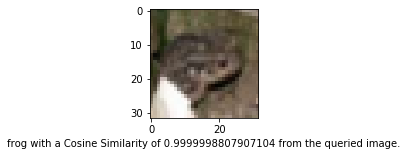

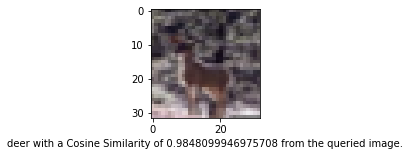

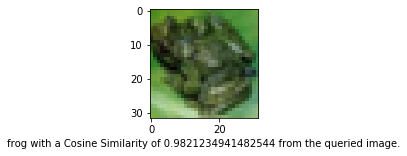

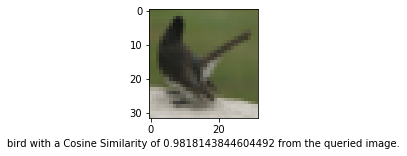

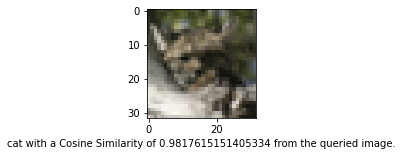

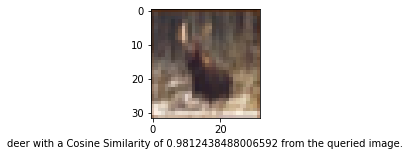

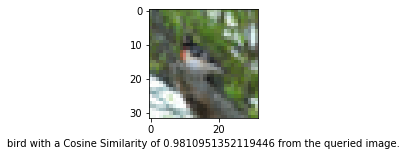

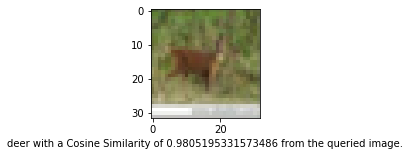

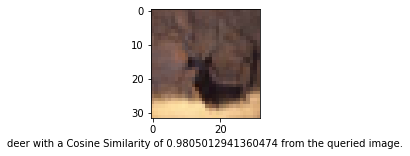

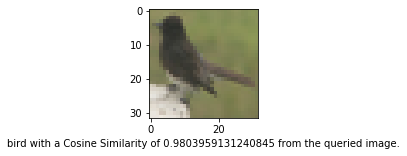

In [30]:
for i in cosine_index:
    plt.figure(figsize = (2, 2))
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.xlabel(final_encoded_test_data_df['Class Name'][i] + ' with a Cosine Similarity of ' + str(final_encoded_test_data_df['Cosine Similarity'][i]) + ' from the queried image.')
    plt.show()

In [31]:
euclidean_distance = []

for i in range(len(x_test)):
    a = final_encoded_test_data_df.loc[final_encoded_test_data_df['Class Name'] == input_val].iloc[int(input_num), 2:]
    b = final_encoded_test_data_df.iloc[i, 2:]
    euc_dist = np.linalg.norm(a-b)
    euclidean_distance.append(euc_dist)
print(len(euclidean_distance))

10000


In [32]:
final_encoded_test_data_df['Euclidean Distance'] = euclidean_distance
final_encoded_test_data_df.sort_values(by = ['Euclidean Distance'])

,Class,Class Name,0,1,2,3,4,5,6,7,...,121,122,123,124,125,126,127,Cosine Similarity,Cosine Distance,Euclidean Distance
43,6,frog,0.314353,0.0,0.0,0.738291,1.091396,0.206023,0.308092,0.000000,...,0.648587,0.0,0.740500,1.422547,0.442037,1.087540,0.393826,1.000000,1.192093e-07,0.000000
7344,4,deer,0.098178,0.0,0.0,0.417737,1.162022,0.469572,0.282775,0.025943,...,0.588978,0.0,0.612704,1.622961,0.267458,1.055493,0.482001,0.984810,1.519001e-02,1.543140
3197,6,frog,0.098742,0.0,0.0,0.703847,1.049663,0.443728,0.467981,0.099789,...,0.600092,0.0,0.673921,1.524587,0.578763,1.001345,0.584512,0.982123,1.787651e-02,1.596898
2939,2,bird,0.166797,0.0,0.0,0.592089,1.082988,0.404687,0.413903,0.115411,...,0.550584,0.0,0.622285,1.829166,0.272281,1.143840,0.549899,0.981814,1.818562e-02,1.601188
3716,3,cat,0.367276,0.0,0.0,0.604415,0.994751,0.089203,0.305825,0.170338,...,0.860618,0.0,0.657519,1.452356,0.685025,0.911246,0.615431,0.981762,1.823848e-02,1.603100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4753,2,bird,0.388729,0.0,0.0,0.125407,3.429570,0.021801,1.450765,0.000000,...,1.238871,0.0,0.619532,1.652882,0.202024,0.953815,0.952646,0.868403,1.315970e-01,7.214783
1078,0,airplane,0.391162,0.0,0.0,0.120136,3.432703,0.003944,1.460726,0.000000,...,0.000000,0.0,0.345289,2.616128,0.339350,1.610521,0.000000,0.853330,1.466701e-01,7.249863
5263,8,ship,0.389533,0.0,0.0,0.122165,3.407760,0.018461,1.437313,0.000000,...,1.252798,0.0,0.707697,1.452322,0.508375,0.838152,0.473082,0.798508,2.014924e-01,7.271650
3444,0,airplane,0.408306,0.0,0.0,0.139348,3.407924,0.000000,1.441578,0.000000,...,0.000000,0.0,0.316725,2.309541,0.000000,1.501013,0.000000,0.835922,1.640783e-01,7.353969


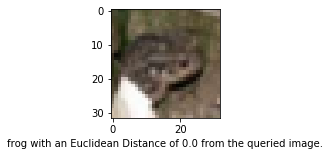

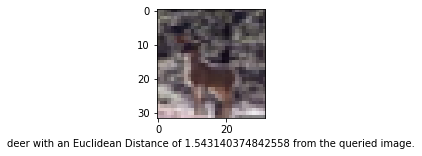

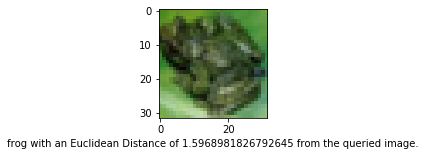

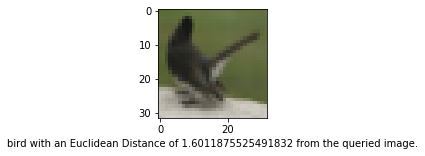

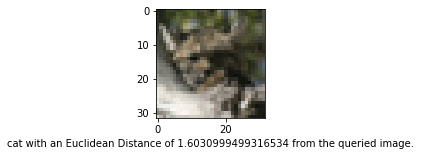

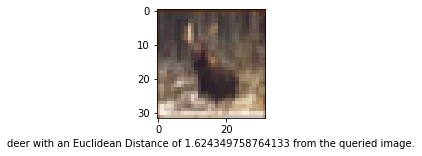

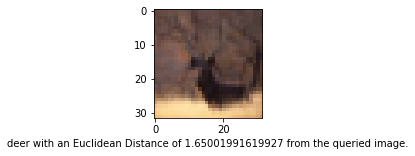

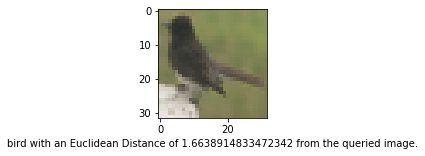

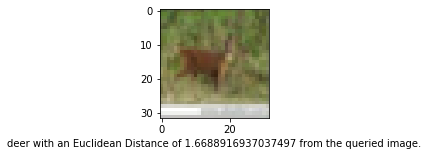

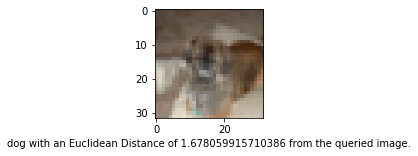

In [33]:
euclidean_index = final_encoded_test_data_df.sort_values(by = ['Euclidean Distance']).head(10).index

for i in euclidean_index:
    plt.figure(figsize = (2, 2))
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.xlabel(final_encoded_test_data_df['Class Name'][i] + ' with an Euclidean Distance of ' + str(final_encoded_test_data_df['Euclidean Distance'][i]) + ' from the queried image.')
    plt.show()